In [6]:
import sys
sys.path.insert(0, '../python')
from bifDiag import bifDiag
from matplotlib import pyplot as plt
import numpy as np

In [14]:
# load AUTO data
id = "1"
bname, sname, dname = "b."+id, "s."+id, "d."+id
bd = bifDiag(bname,sname)

In [15]:
# these are the types and labels for algebraic problems
# "user output point" is type number -4, so this works for that
AUTOtypes = ["","BP","LP","HB","","","UZ","","","EP"]
NDim = bd[0].c['NDIM']

# branches of the solution
branches = [ 
         { "par"       : br.coordarray[0,:], 
           "L2norm"    : br.coordarray[1,:],
           "branchnum" : br.BR
         } for br in bd ]

# individual solutions
sols = [ {  "u"         : np.array( s[0]['u'] ),
            "L2norm"    : np.linalg.norm( s[0]['u'] ),
            "par"       : s.PAR[0],
            "w"         : s.PAR[1],
            "a"         : s.PAR[2],
            "b"         : s.PAR[3],
            "branchnum" : s.data['BR'],
            "typenum"   : s.data['TY number'],
            "type"      : AUTOtypes[ s.data['TY number'] ],
         } for s in bd() ]

In [16]:
# plot solution along with place on bifurcation diagram
def plotsol(s, index, save=0):
    fig, axs = plt.subplots(1, 1)

    # solution
    sol = s[index]['u']
    axs.plot( range(len(sol)), sol  )
    axs.scatter( range(len(sol)), sol ) 

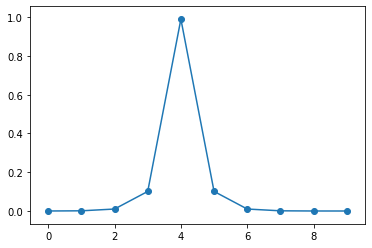

In [18]:
plotsol(sols, 1)